# YOLOv5 Object Detection Model 

The code below was heavily influenced by the **[YOLOv5 🚀 tutorial notebook](https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=zR9ZbuQCH7FX)** created by **Ultralytics**. Direct lines were borrowed in order to build, train, and test object detection models.


# 0. Setup

*    Mount Google Drive to Google Colab for easy file access.
*   Clone repo, install dependencies and check PyTorch and GPU.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# % denotes shell command
# update path for yolov5 clone

main_path = '/content/drive/MyDrive/researchpaper2023/' 
project_folder = '01_scripts/YOLOv5_v00/' # create file in directory

%cd {main_path}{project_folder}
!git clone https://github.com/ultralytics/yolov5   # clone and create unique folder
%cd {main_path}{project_folder}'yolov5'
!git pull origin master # In case yolov5 already existed, we pull an update
%pip install -qr requirements.txt  # install

/content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/01_scripts/YOLOv5_v00
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/01_scripts/YOLOv5_v00/yolov5
From https://github.com/ultralytics/yolov5
 * branch            master     -> FETCH_HEAD
Already up to date.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.4.0 which is incompatible.


In [ ]:
%cd {main_path}{project_folder}'yolov5'

import torch
import utils
display = utils.notebook_init()  # check

YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 25.6/166.8 GB disk)


# 1. Training

In [ ]:
dataset_path = '/content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/'
yaml_path = dataset_path + 'yolo.yaml'

%cd {main_path}{project_folder}'yolov5'
!python 'train.py' --epochs 20 --data {yaml_path} --weights yolov5s.pt --cache 

/content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/01_scripts/YOLOv5_v00/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/yolo.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, w

# Train segmentation version of the model

In [ ]:
dataset_path = '/content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/'
yaml_path = dataset_path + 'yolo.yaml'

%cd {main_path}{project_folder}'yolov5'
!python segment/train.py --epochs 20 --data {yaml_path} --weights yolov5s-seg.pt --cache 

/content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/01_scripts/YOLOv5_v00/yolov5
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/yolo.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_e

# 3. Test Model

Next we will test the tuned model against our test dataset.

In [ ]:
# Run YOLOv5 on imgfile_test
# replace weights with best.pt file from trained model above

bestweights_path = '/content/drive/MyDrive/researchpaper2023/01_scripts/YOLOv5_v00/yolov5/runs/train/exp26/weights/best.pt'
yaml_path = '/content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/yolo.yaml'

!python val.py --weights {bestweights_path} --data {yaml_path} --img 512 --iou 0.65

Traceback (most recent call last):
  File "val.py", line 408, in <module>
    opt = parse_opt()
  File "val.py", line 365, in parse_opt
    opt.data = check_yaml(opt.data)  # check YAML
  File "/content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/01_scripts/YOLOv5_v00/yolov5/utils/general.py", line 465, in check_yaml
    return check_file(file, suffix)
  File "/content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/01_scripts/YOLOv5_v00/yolov5/utils/general.py", line 472, in check_file
    if os.path.isfile(file) or not file:  # exists
  File "/usr/lib/python3.8/genericpath.py", line 30, in isfile
    st = os.stat(path)
KeyboardInterrupt
^C


Segmentation model

In [ ]:
# Run YOLOv5 on imgfile_test
# replace weights with best.pt file from trained model above

bestweights_path = '/content/drive/MyDrive/researchpaper2023/01_scripts/YOLOv5_v00/yolov5/runs/train-seg/exp/weights/best.pt'
yaml_path = '/content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/yolo.yaml'

!python segment/val.py --weights {bestweights_path} --data {yaml_path} --img 512 --task test

segment/val: data=/content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/yolo.yaml, weights=['/content/drive/MyDrive/researchpaper2023/01_scripts/YOLOv5_v00/yolov5/runs/train-seg/exp/weights/best.pt'], batch_size=32, imgsz=512, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
test: Scanning /content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/00_datasets/testaug_voc_combined/test/labels... 1252 images, 2252 backgrounds, 0 corrupt: 100% 2504/2504 [02:14<00:00, 18.66it/s]
test: New cache created: /content/drive/.shortcut-targets-b

In [ ]:
import os
count = 0
for f in os.listdir("/content/drive/MyDrive/researchpaper2023/00_datasets/testaug_voc_combined/test/images"):

print(count)

1252


# 4. Run Inference  With Tuned Weights

In [ ]:
# replace weights with best.pt file from tuned train model
images_public_path = '/content/drive/MyDrive/researchpaper2023/00_datasets/testaug_voc_combined/test/images'
%cd {main_path}{project_folder}'yolov5'
!python detect.py --weights {bestweights_path} --img 512 --conf 0.25 --source {images_public_path}

/content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9AwG9A-sBY1/researchpaper2023/01_scripts/YOLOv5_v00/yolov5
detect: weights=['/content/drive/MyDrive/researchpaper2023/01_scripts/YOLOv5_v00/yolov5/runs/train/exp26/weights/best.pt'], source=/content/drive/MyDrive/researchpaper2023/00_datasets/testaug_voc_combined/test/images, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1252 /content/drive/.shortcut-targets-by-id/1ZuosUjKypvw1UmCPtlehZ9

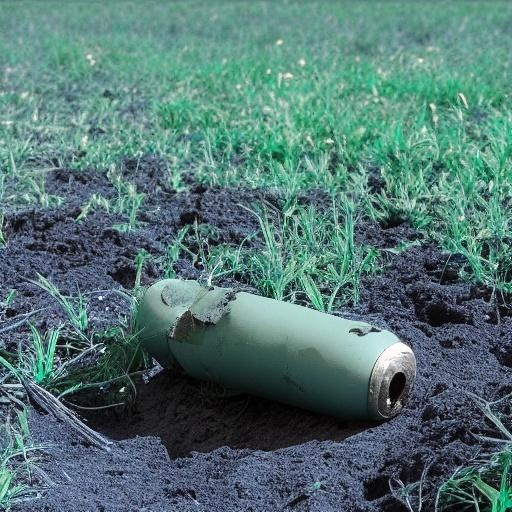

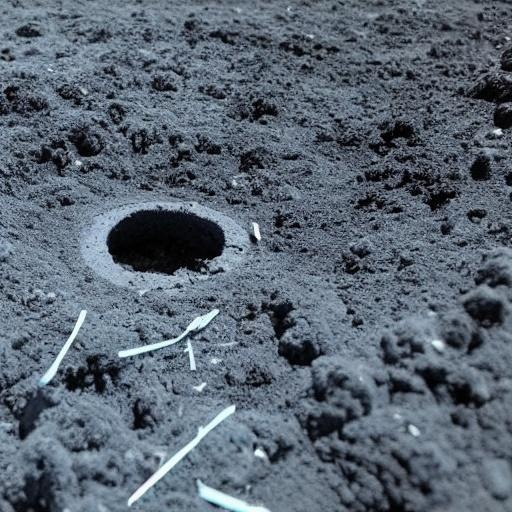

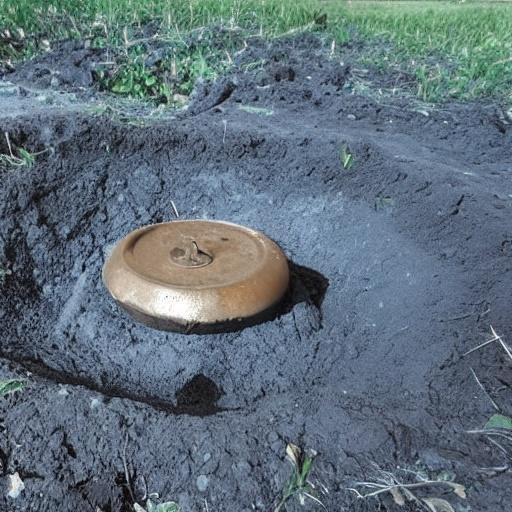

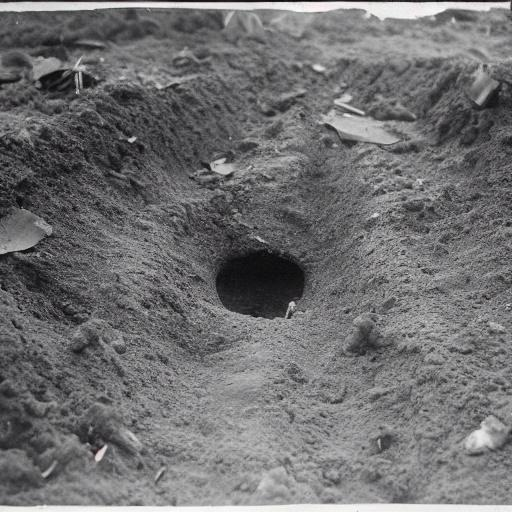

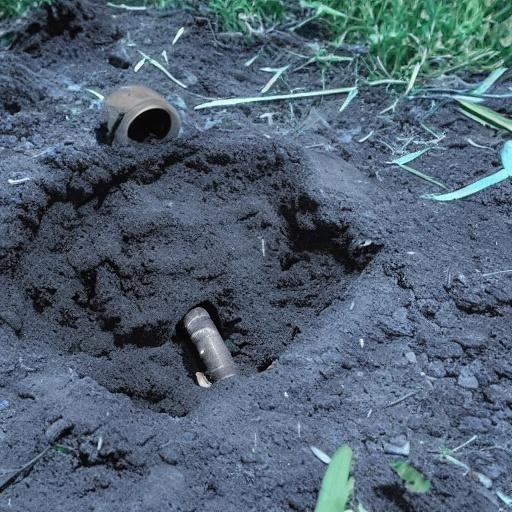

In [ ]:
#display inference on the 5 test images

import glob
from IPython.display import Image, display

count = 0
for imageName in glob.glob('/content/drive/MyDrive/researchpaper2023/YOLOv5_v00/yolov5/runs/detect/exp/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")
    count += 1
    if count > 100:
      break

In [ ]:
# from utils.dataloaders import autosplit
# dataset_path = main_path + "00_datasets/combined_train_dataset/train/images"
# autosplit(path=dataset_path, weights=(0.8, 0.2, 0.0))

Autosplitting images from /content/drive/MyDrive/researchpaper2023/00_datasets/combined_train_dataset/train/images


100%|██████████| 2160/2160 [00:05<00:00, 415.70it/s]
